# This is to determine how many z-stacks are affected by the tissue/gel surface background in the red channel and try to remove them
###Method#####
#1. I saw some high background in the red channels after a few rounds of imaging, and in order to remove cells that are within that area and likely affected, I am trying to figure out how to remove the background. 

In [1]:
import os, sys,z5py
import numpy as np
import pandas as pd
from glob import glob 
from skimage.io import imread, imsave
from os.path import abspath, dirname
sys.path.append("/Users/wangy6/Desktop/DATA/Codes/Python/n5_cut tiles/")
import n5_metadata_utils as n5mu
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('default')
from scipy import stats
import plotly.express as px
import seaborn as sns

In [2]:
# get appropriate image data    
img='/Volumes/multifish/Yuhan/LHA3/stitch/R3_LHA3/export.n5/'
subpath='c2/s2'
#voxel size in µm (x, y, z)
vox= n5mu.read_voxel_spacing(img, subpath)
#image size in pixel (x, y, z)
grid=n5mu.read_voxel_grid(img, subpath)
size=grid*vox
print(vox)
print(grid)
print(size)

[0.92 0.92 0.84]
[1790 1790  811]
[1646.8  1646.8   681.24]


In [176]:
###Input information here: cell ID, image volume size, channels###
channel_1='c3'
imdir=pd.DataFrame(data=('reR2', 'reR4','reR5', 'reR6','reR7', 'reR8','reR9', 'reR10'), dtype=object)
#imdir='/Volumes/multifish/Yuhan/LHA3/stitch/R3_LHA3/export.n5/'
# get n5 image data for channel 1
#df = pd.DataFrame(data=np.empty([len(np.arange(600,815,10)),0]), index=np.arange(600,815,10), dtype=float)
for j in imdir[0]:
    for i in np.arange(600,815,10):
        im = z5py.File('/Volumes/multifish/Yuhan/LHA3/register/'+ j +'_LHA3'+'/warped/', use_zarr_format=False)       
        img = im[channel_1+'/s2'][i,500:1000,500:1000]
        n,b=np.histogram(np.ndarray.flatten(img[img!=0]), bins=500)
        df.loc[i,'%s' % (j)]=b[np.argwhere(n == n.max())][0][0]

In [172]:
for i in np.arange(600,815,10):
    im = z5py.File('/Volumes/multifish/Yuhan/LHA3/stitch/R3_LHA3/export.n5/', use_zarr_format=False)       
    img = im[channel_1+'/s2'][i,500:1000,500:1000]
    n,b=np.histogram(np.ndarray.flatten(img[img!=0]), bins=500)
    df.loc[i,'reR3']=b[np.argwhere(n == n.max())][0][0]

In [182]:
df

,reR7,reR8,reR9,reR10,reR3,reR2,reR4,reR5,reR6
600,296.800,244.132,243.938,365.976,259.450,256.760,321.312,243.996,341.712
610,295.640,244.604,247.952,363.776,254.940,256.584,322.780,242.790,347.456
620,304.960,241.676,248.728,370.368,259.906,257.136,327.888,243.300,344.888
630,299.286,240.290,244.872,375.602,264.164,257.500,332.700,242.424,346.978
640,301.968,243.252,245.952,384.830,258.856,258.504,336.670,243.720,374.848
650,299.974,239.808,242.920,396.952,266.604,260.632,340.888,251.850,381.838
660,300.528,242.936,246.770,403.978,267.900,261.790,351.940,265.852,405.268
670,324.946,246.848,246.804,415.820,265.656,259.312,368.956,284.114,443.928
680,333.748,266.876,280.876,423.160,340.960,397.988,471.656,263.636,589.952
690,417.870,277.702,282.898,447.888,360.160,364.736,438.416,264.700,590.952


In [184]:
df.to_csv('/Volumes/multifish/Yuhan/LHA3/analysis/spot/4_intensity/c3_remove_z_steps.csv')

In [8]:
df=pd.read_csv('/Volumes/multifish/Yuhan/LHA3/analysis/spot/4_intensity/c3_remove_z_steps.csv', sep=',', index_col=0)

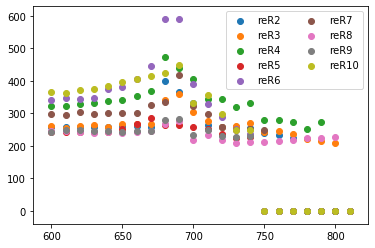

In [25]:
plt.scatter(df.index,df['reR2'])
plt.scatter(df.index,df['reR3'])
plt.scatter(df.index,df['reR4'])
plt.scatter(df.index,df['reR5'])
plt.scatter(df.index,df['reR6'])
plt.scatter(df.index,df['reR7'])
plt.scatter(df.index,df['reR8'])
plt.scatter(df.index,df['reR9'])
plt.scatter(df.index,df['reR10'])
plt.legend(['reR2','reR3','reR4','reR5','reR6','reR7','reR8','reR9','reR10'], ncol=2)